In [ ]:
# 1️⃣ Mount Google Drive to Save Model
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Install Kaggle API & Load Dataset
!pip install -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_API_KEY"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ammaralfaifi/5class-weather-status-image-classification
!unzip -q 5class-weather-status-image-classification.zip -d /content/weather_dataset

# 3️⃣ Import Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os

# 4️⃣ Define Dataset Path
data_dir = "/content/weather_dataset/data"
img_size = (224, 224)  # MobileNetV2 input size
batch_size = 32

# 5️⃣ Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# 6️⃣ Load Pretrained MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output_layer = Dense(5, activation="softmax")(x)  # 5 classes

model = Model(inputs=base_model.input, outputs=output_layer)

# 7️⃣ Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 8️⃣ Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Increase if needed
    verbose=1
)

# 9️⃣ Save Model to Google Drive
model.save("/content/drive/MyDrive/weather_model.h5")
print("✅ Model saved successfully in Google Drive!")



Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/ammaralfaifi/5class-weather-status-image-classification
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 497M/498M [00:18<00:00, 34.2MB/s]
100% 498M/498M [00:18<00:00, 28.3MB/s]
Found 14432 images belonging to 5 classes.
Found 3606 images belonging to 5 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 849s 2s/step - accuracy: 0.6272 - loss: 0.8325 - val_accuracy: 0.4212 - val_loss: 1.8344
Epoch 2/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.7927 - loss: 0.4854 - val_accuracy: 0.3821 - val_loss: 2.6660
Epoch 3/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.8170 - loss: 0.4321 - val_accuracy: 0.4074 - val_loss: 2.5253
Epoch 4/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 830s 2s/step - accuracy: 0.8460 - loss: 0.3707 - val_accuracy: 0.3932 - val_loss: 3.3051
Epoch 5/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 847s 2s/step - accuracy: 0.8656 - loss: 0.3289 - val_accuracy: 0.4129 - val_loss: 3.0813
Epoch 6/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 862s 2s/step - accuracy: 0.8918 - loss: 0.2703 - val_accuracy: 0.4027 - val_loss: 3.2016
Epoch 7/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.9062 - loss: 0.2353 - val_accuracy: 0.4104 - val_loss: 3.6262
Epoch 8/10
451/451 ━━━━━━━━━━━━━━━━━━━━ 850s 2s/step - accuracy: 0.9263 - loss: 0.1912 - val_accu

✅ Model saved successfully in Google Drive!


In [ ]:
# 1️⃣ Mount Google Drive (If Not Mounted)
from google.colab import drive
drive.mount('/content/drive')

# 2️⃣ Load the Saved Model
from tensorflow.keras.models import load_model
model_path = "/content/drive/MyDrive/weather_model.h5"
model = load_model(model_path)
print("✅ Model loaded successfully!")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model loaded successfully!


In [ ]:
model.save('/content/drive/My Drive/weather_model.keras')


In [ ]:
!ls "/content/drive/My Drive"


 312422243120.pdf		       'Getting started.pdf'	  'RAMYA S-ADS-C.jpg'
 certificate.pdf		       'Level 2 Certificate.pdf'  'RAMYA S_copy.pdf'
 Classroom			       'mini project '		   RAMYA-S.pdf
'Colab Notebooks'		        OfferLetter.pdf		  'The spark wits.pptx'
 data				        passport.jpg		  'Untitled spreadsheet.gsheet'
 DOC-20231027-WA0001.		        PAY.jpg			  'V SEM.gsheet'
'DocScanner 10-Jun-2023 12-39 pm.pdf'   payment.jpg		   weaather
'Document from .'		        ramya-resume.pdf	   weather_dataset
'Document from . (1)'		        RamyaResume.pdf		   weather_model.h5
'experiment 3.docx'		       'RAMYA S -ADS -C (1).jpg'   weather_model.keras
'flower (1).fig'		       'RAMYA S -ADS -C.jpg'
 flower.fig			       'RAMYA S -ADS-C.jpg'


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/weather_model.keras')
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving foggy.jpg to foggy.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


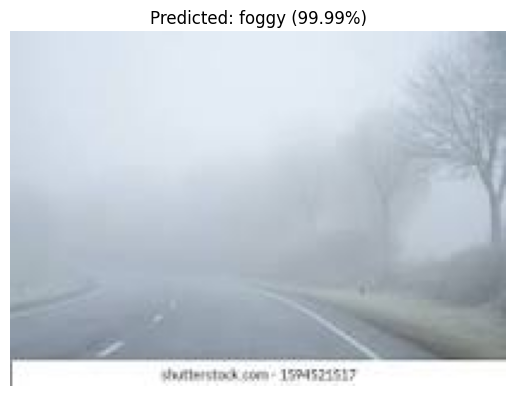

Predicted Weather: foggy with 99.99% confidence.


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define class labels (ensure order matches training labels)
class_labels = ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']

def predict_weather(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to model input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get class index
    confidence = np.max(predictions) * 100  # Confidence score

    # Display image with prediction
    plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
    plt.axis('off')
    plt.title(f"Predicted: {class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.show()

    return class_labels[predicted_class], confidence

# Test with an uploaded image
img_path = ".jpg"  # Change to your image path
predicted_class, confidence = predict_weather(img_path)
print(f"Predicted Weather: {predicted_class} with {confidence:.2f}% confidence.")